In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## step 1 定義觀測值
data = np.array([[1,4] ,[1, 3], [0, 4], [5,1], [6, 2], [4, 0]])

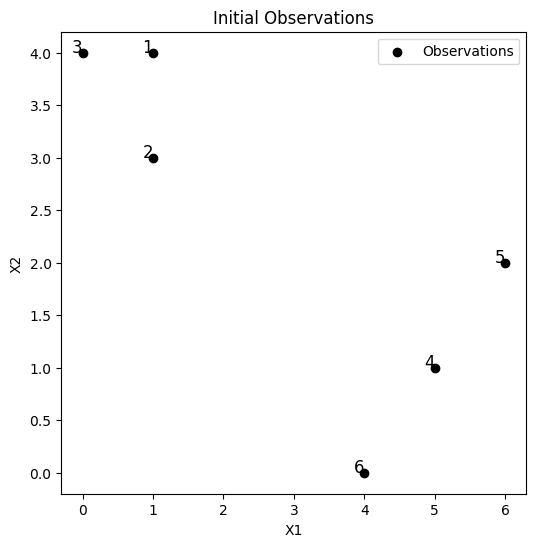

In [6]:
##(a) Plot the observations
plt.figure(figsize=(6,6))
plt.scatter(data[:, 0], data[:, 1], c='black', label = 'Observations')
for i, txt in enumerate(range(1, 7)):
    plt.annotate(txt, (data[i, 0], data[i, 1]), fontsize=12, ha='right')
plt.title("Initial Observations")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


Initial Cluster Labels: [1 2 2 1 2 2]
Iteration 1: Centroids = [[3.   2.5 ]
 [2.75 2.25]]
Iteration 1: New Labels = [2 2 2 1 1 2]
Iteration 2: Centroids = [[5.5  1.5 ]
 [1.5  2.75]]
Iteration 2: New Labels = [2 2 2 1 1 1]
Iteration 3: Centroids = [[5.         1.        ]
 [0.66666667 3.66666667]]
Iteration 3: New Labels = [2 2 2 1 1 1]
Cluster labels have stabilized, stopping iteration.


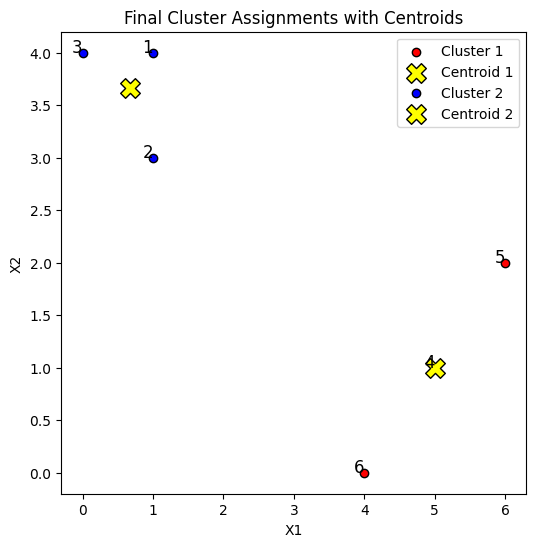

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1,4] ,[1, 3], [0, 4], [5,1], [6, 2], [4, 0]])

##(b)隨機分配群集（k=2)
np.random.seed(0)
initial_labels = np.random.choice([1, 2], size = data.shape[0])
print("Initial Cluster Labels:", initial_labels)

##定義函數來計算新的群集中心
def compute_centroids(data, labels, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(1, k+1):
        centroids[i - 1,:] = np.mean(data[labels == i], axis=0)
    return centroids
##定義函數來計算每個觀測值的距離 並重新分配群集
def assign_clusters(data, centroids):
    distances =  np.zeros((data.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:,i] = np.linalg.norm(data - centroid, axis=1)
    return np.argmin(distances, axis=1) +1

##(c)(d)(e)重複執行到群集標籤不再改變
k = 2  
labels = initial_labels
iteration = 0
max_interations = 20 ###防止無限迴圈

while True:
    iteration += 1
    centroids = compute_centroids(data, labels, k)
    print(f"Iteration {iteration}: Centroids = {centroids}")
    ###依據群集中心，分配每個觀測值到最近的群集
    new_labels = assign_clusters(data, centroids)
    print(f"Iteration {iteration}: New Labels = {new_labels}")
    ##群集不再改變 就停下來
    if np.array_equal(new_labels, labels):
        print("Cluster labels have stabilized, stopping iteration.")
        break
    if iteration >= max_interations:
        print(f"Reached maximum iterations ({max_iterations}). Stopping loop.")
        break
    labels = new_labels

# (f) 最終分群結果繪圖
colors = ['red', 'blue']
plt.figure(figsize=(6, 6))
for i in range(1, k + 1):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], 
                c=colors[i-1], label=f'Cluster {i}', edgecolor='black')
    plt.scatter(centroids[i-1, 0], centroids[i-1, 1], 
                c='yellow', marker='X', s=200, edgecolor='black', label=f'Centroid {i}')
    
for i, txt in enumerate(range(1, 7)):
    plt.annotate(txt, (data[i, 0], data[i, 1]), fontsize=12, ha='right')
    
plt.title("Final Cluster Assignments with Centroids")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()
